In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import os
from utils import imread
import matplotlib.pyplot as plt
from drawBlobs import drawBlobs
import numpy as np
%matplotlib inline

/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
imgs = ['butterfly.jpg', 'einstein.jpg', 'fishes.jpg', 'sunflowers.jpg']
numBlobsToDraw = 500
imageName = imgs[1]
datadir = os.path.join('..', 'data', 'blobs')

In [32]:
def py_im2double(img):
    #grayscaled = rgb2gray(img)
    grayscaled = img
    original_img = grayscaled.astype('float')
    img_min, img_max = np.min(original_img.ravel()), np.max(original_img.ravel())
    return (original_img - img_min) / (img_max - img_min)


def return_blobs(blob_location):
    blobs = np.zeros((len(blob_location), 5))
    i = 0
    for item in blob_location:
        y, x = item[0], item[1]
        radius = item[3] * np.sqrt(3)
        score = item[2]
        blobs[i] = [x, y, radius, -1, score] #(x, y, radius, angle, score)
        i+=1
    return blobs

def get_count(blob_location):
    x1 = set(blob_location[:, 3])
    count = {}
    for x in blob_location:
        ele = x[3]
        if count.get(ele) is None:
            count[ele] = 1
        else: 
            present_count = count.get(ele)
            count[ele] = present_count + 1
    return count

In [12]:
for im_ in range(len(imgs)):
    im = imread(os.path.join(datadir, imgs[im_]))
    blob_location = blob_log(im, max_sigma=90, num_sigma=17, threshold=.03)
    blobs = return_blobs(blob_location)
    cnt_blobs = get_count(blob_location)
    
    plt.subplot(len(imgs), 1, im_+1)
    print ("Running for {}".format(imgs[im_]))
    print (cnt_blobs)
    drawBlobs(im, blobs)
    sys.exit(-1)

KeyboardInterrupt: 

In [ ]:
for im_ in range(len(imgs)):
    im = imread(os.path.join(datadir, imgs[im_]))
    blob_location = blob_log(im, max_sigma=90, num_sigma=17, threshold=.03)
    blobs = return_blobs(blob_location)
    cnt_blobs = get_count(blob_location)
    
    plt.subplot(len(imgs), 1, im_+1)
    print ("Running for {}".format(imgs[im_]))
    print (cnt_blobs)
    drawBlobs(im, blobs, 750)
    sys.exit(-1)

Running for butterfly.jpg
{0.0: 2875, 1.0: 3271, 2.0: 1352}


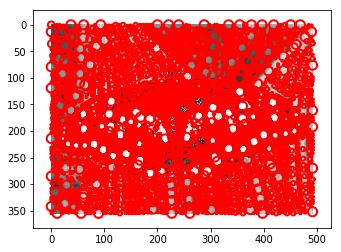

In [5]:
im_ = 0
im = imread(os.path.join(datadir, imgs[im_]))
blob_location = blob_log(im, min_sigma=1.7 max_sigma=5, num_sigma=10, threshold=.03)
blobs = return_blobs(blob_location)
cnt_blobs = get_count(blob_location)

#plt.subplot(len(imgs), 1, im_+1)
print ("Running for {}".format(imgs[im_]))
print (cnt_blobs)
drawBlobs(im, blobs, 750)
#sys.exit(-1)

In [36]:
blob_location = blob_log(py_im2double(im), min_sigma=1.0, max_sigma=40, num_sigma=15, threshold=.03)
blobs = return_blobs(blob_location)
cnt_blobs = get_count(blob_location)

In [37]:
blobs = return_blobs(blob_location)

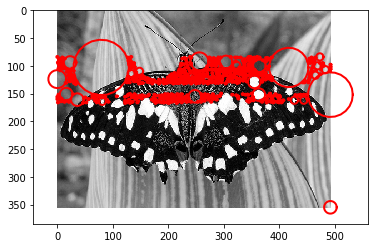

In [38]:
drawBlobs(im, blobs, 750)

In [39]:
cnt_blobs = get_count(blob_location)
cnt_blobs

{1.0: 3940,
 3.7857142857142856: 78,
 6.571428571428571: 50,
 9.357142857142858: 10,
 12.142857142857142: 7,
 14.928571428571427: 1,
 17.714285714285715: 3,
 20.5: 1,
 23.285714285714285: 2,
 26.07142857142857: 2,
 28.857142857142854: 1,
 40.0: 1}

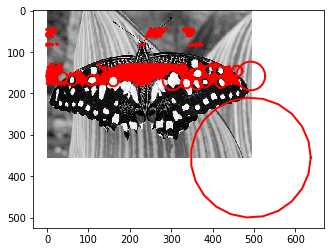

In [35]:
drawBlobs(im, blobs, 750)

In [26]:
cnt_blobs = get_count(blob_location)
cnt_blobs

{1.7: 799,
 11.51111111111111: 28,
 21.32222222222222: 2,
 31.13333333333333: 1,
 40.94444444444444: 1,
 70.37777777777778: 1,
 80.18888888888888: 2}